###Import libraries

In [8]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

### 2. Data Loading

In [9]:
df = pd.read_csv("netflix_titles.csv", on_bad_lines='skip', engine='python')


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


### 3. Content Distribution

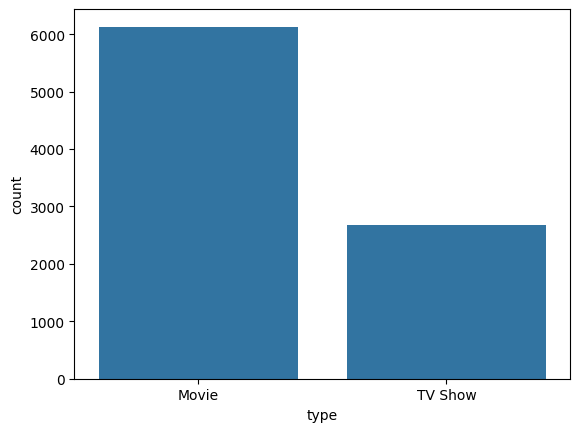

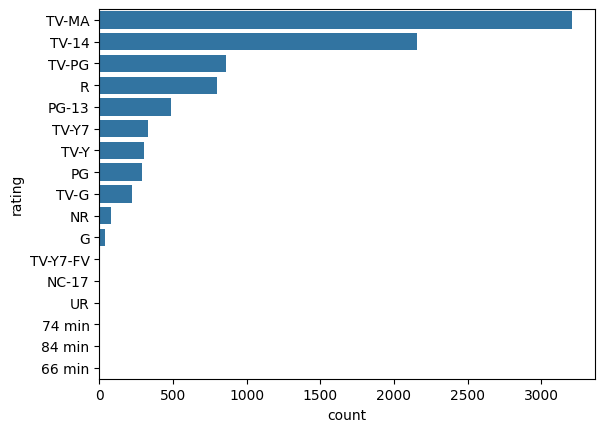

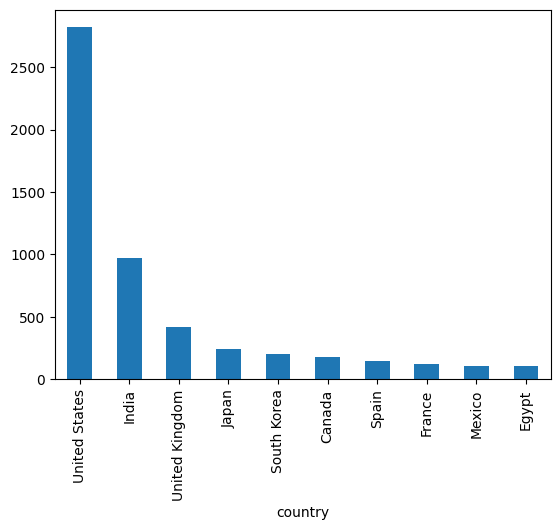

In [10]:
sns.countplot(x='type', data=df); plt.show()
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index); plt.show()
df['country'].value_counts().head(10).plot(kind='bar'); plt.show()

### 4. Time Trends

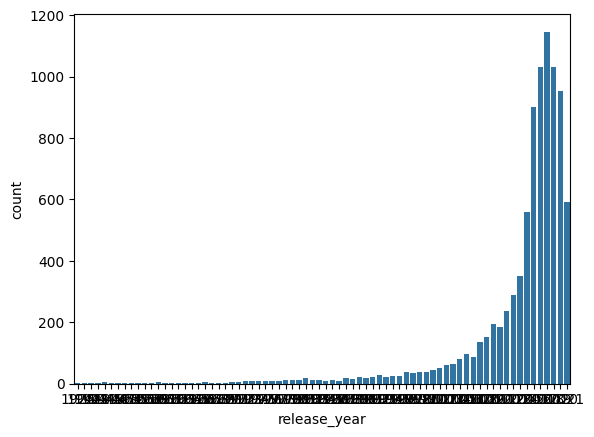

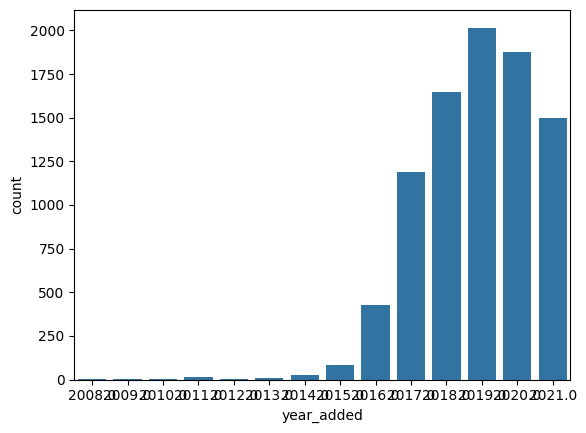

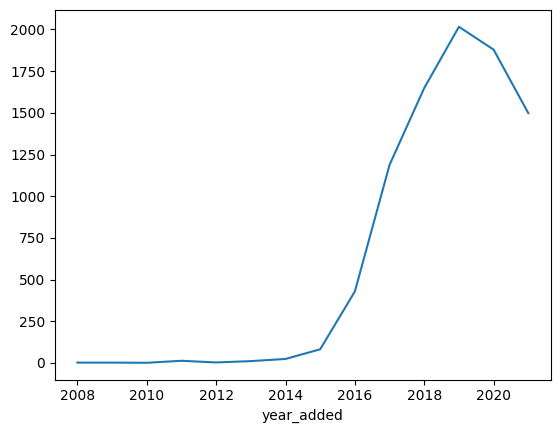

In [11]:
sns.countplot(x='release_year', data=df, order=sorted(df['release_year'].unique())); plt.show()
sns.countplot(x='year_added', data=df); plt.show()
df['year_added'].value_counts().sort_index().plot(); plt.show()

### 5. Duration Analysis

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1280641312.py:2: SyntaxWarning: invalid escape sequence '\d'
  df[df.type=='TV Show']['duration'].str.extract('(\d+)').astype(float).plot.hist(); plt.show()


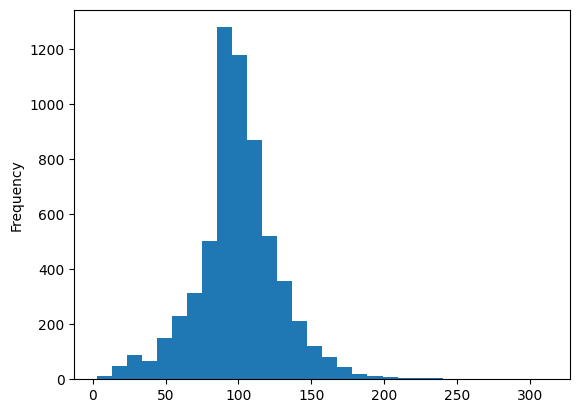

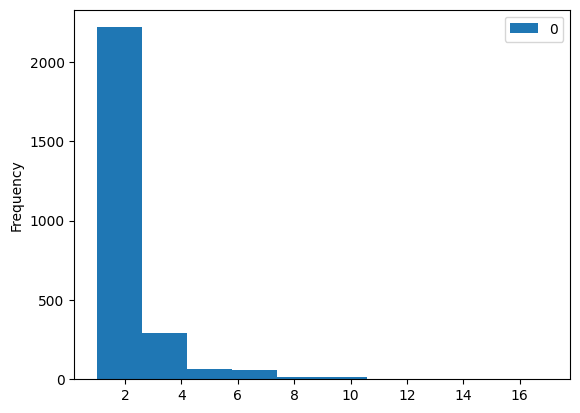

In [12]:
df[df.type=='Movie']['duration'].dropna().str.replace(" min","").astype(int).astype(int).plot.hist(bins=30); plt.show()
df[df.type=='TV Show']['duration'].str.extract('(\d+)').astype(float).plot.hist(); plt.show()

### 6. Genres / Directors / Actors

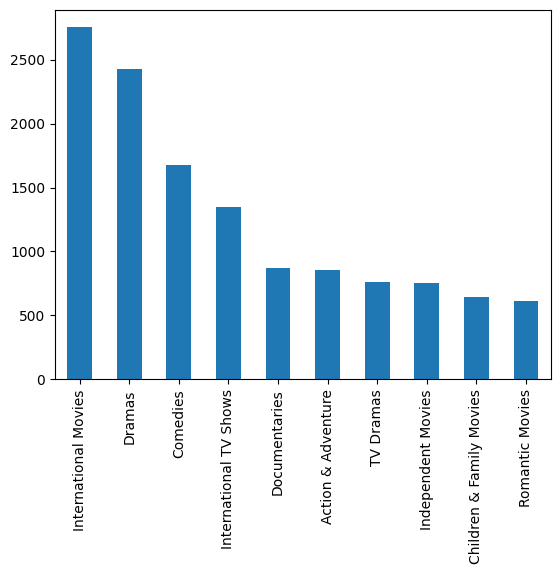

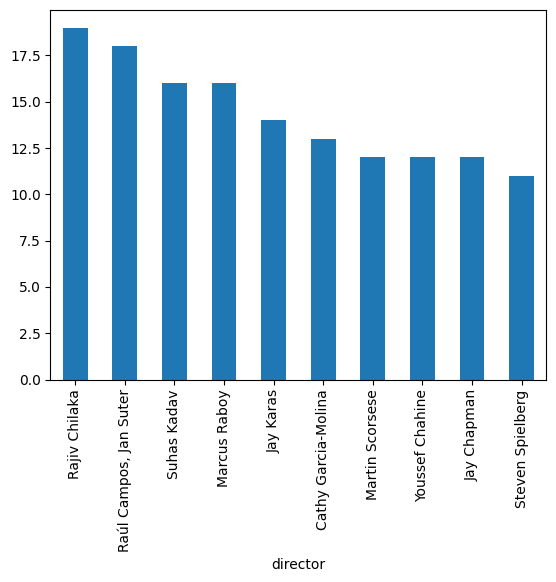

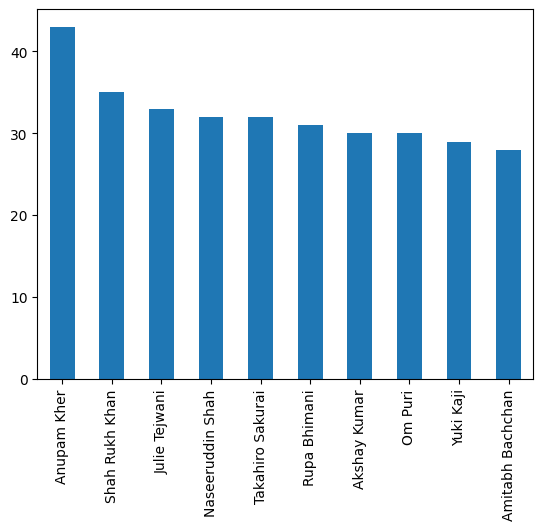

In [13]:
genres = Counter([g.strip() for l in df['listed_in'].dropna().str.split(',') for g in l])
pd.Series(genres).nlargest(10).plot.bar(); plt.show()
df['director'].value_counts().head(10).plot.bar(); plt.show()
actors = Counter([a.strip() for l in df['cast'].dropna().str.split(',') for a in l])
pd.Series(actors).nlargest(10).plot.bar(); plt.show()

### 7. Word Cloud

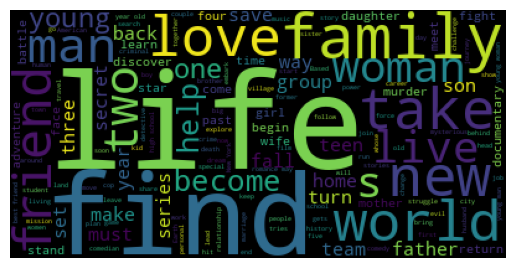

In [14]:
plt.imshow(WordCloud(background_color="black").generate(" ".join(df['description'].dropna()))); plt.axis("off"); plt.show()

### 8. Month-wise Additions

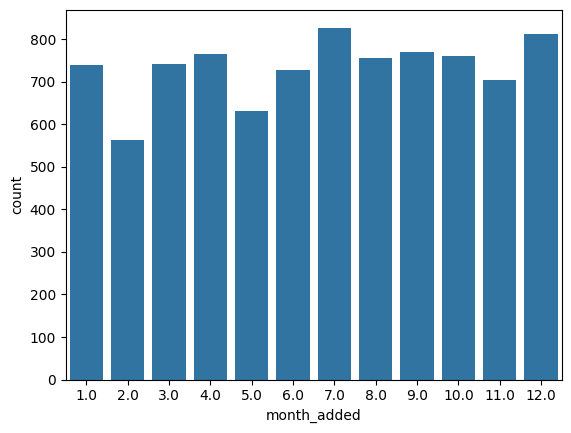

In [15]:
sns.countplot(x='month_added', data=df); plt.show()

### 9. Movies vs TV by Country

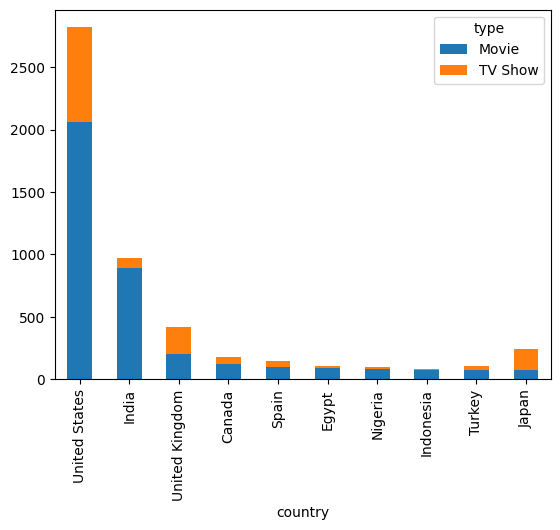

In [16]:
df.groupby(['country','type']).size().unstack().fillna(0).sort_values('Movie', ascending=False).head(10).plot.bar(stacked=True); plt.show()

### 10. Ratings by Type

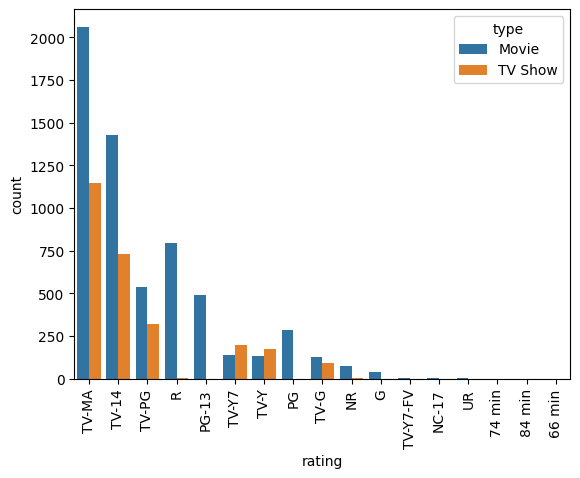

In [17]:
sns.countplot(x='rating', hue='type', data=df, order=df['rating'].value_counts().index); plt.xticks(rotation=90); plt.show()

###11. Oldest/Newest

In [18]:
print("Oldest:", df[df.release_year==df.release_year.min()]['title'].values)
print("Newest:", df[df.release_year==df.release_year.max()]['title'].values)

Oldest: ['Pioneers: First Women Filmmakers*']
Newest: ['Blood & Water' 'Ganglands' 'Jailbirds New Orleans' 'Kota Factory'
 'Midnight Mass' 'My Little Pony: A New Generation'
 'The Great British Baking Show' 'The Starling'
 'Vendetta: Truth, Lies and The Mafia' 'Bangkok Breaking' 'Je Suis Karl'
 'Confessions of an Invisible Girl' 'Crime Stories: India Detectives'
 'Dear White People' 'Intrusion' 'Jaguar'
 'Monsters Inside: The 24 Faces of Billy Milligan'
 'Go! Go! Cory Carson: Chrissy Takes the Wheel' 'Love on the Spectrum'
 'Ankahi Kahaniya' 'Chicago Party Aunt' 'Squid Game'
 'The Father Who Moves Mountains' 'The Stronghold' 'Chhota Bheem'
 'He-Man and the Masters of the Universe' 'My Heroes Were Cowboys'
 'Castle and Castle' 'Nailed It' 'Nightbooks' 'Numberblocks' 'Schumacher'
 'Too Hot To Handle: Latino' 'A StoryBots Space Adventure'
 'Jack Whitehall: Travels with My Father'
 "The World's Most Amazing Vacation Rentals" 'You vs. Wild: Out Cold'
 'Little Singham - Black Shadow' 'Tughla

###12. Genre correlation

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


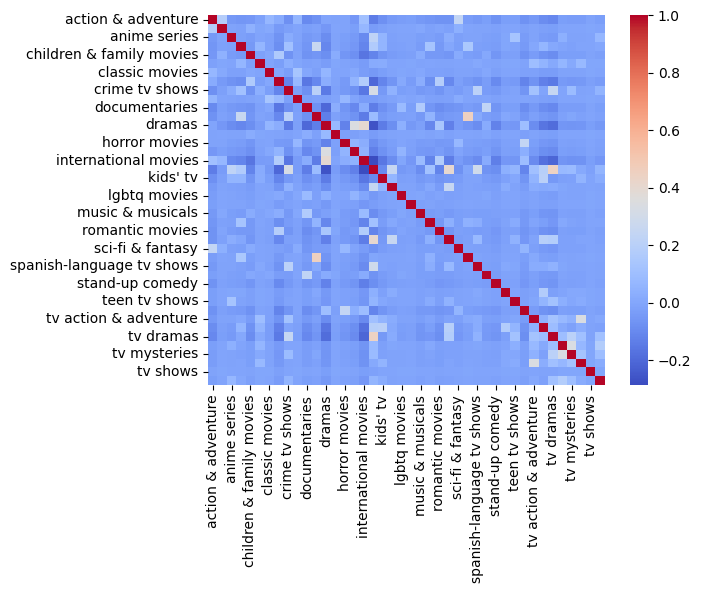

In [19]:
cv = CountVectorizer(tokenizer=lambda x: x.split(', '))
gdf = pd.DataFrame(cv.fit_transform(df['listed_in'].fillna('')).toarray(), columns=cv.get_feature_names_out())
sns.heatmap(gdf.corr(), cmap="coolwarm"); plt.show()